# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df_ic = pd.read_pickle(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\instacart_dataframe.pkl')
#import dataframe 

In [102]:
df_ic.head(1)

,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,user_frequency,median_days_since_prior,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,shopping_period
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423,Morning


In [ ]:
df_ic.shape

In [101]:
df_ic.columns

Index(['order_id', 'user_id', 'order_number', 'day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order_flag',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_price_per_user', 'spending_flag', 'user_frequency',
       'median_days_since_prior', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'shopping_period'],
      dtype='object')

# Data Analysis

PII data or customer sensitive data, including names, phone numbers, and email adresses, were removed as part of analysis and study of the customer dataframe in A9-2. This information was removed to protect the privacy of customers (the columns removed were surname and first name)

In [3]:
np.random.seed(4)

In [5]:
dev = np.random.rand(len(df_ic)) <= 0.7
#create a 70 30 sample for study

In [6]:
big = df_ic[dev]
#70 percent of data sample

In [9]:
df_sampleic = df_ic[~dev]
#30 percent of data sample

In [12]:
df_sampleic = df_sampleic.copy()
#define sample for study

With a large dataframe, memory issues can occur. This dataframe is being split 70 / 30 where the data studied is a small percentage of the total.

## Region Study

In [10]:
region_mapping = {
    'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest',
    'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South',
    'Maine': 'Northeast', 'Maryland': 'South', 'Massachusetts': 'Northeast',
    'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South',
    'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest',
    'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast',
    'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South',
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South',
    'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast',
    'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South',
    'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South',
    'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}


This code is to seperate all fifty states into their respective regions for further analysis

In [13]:
df_sampleic['Region'] = df_sampleic['STATE'].map(region_mapping)
#map states to regions

In [14]:
df_sampleic.head(1)
#confirm new column added

,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,user_frequency,median_days_since_prior,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423,South


In [15]:
df_sampleic['Region'].value_counts()
#determine count of customers by region

Region
South        3056757
West         2488396
Midwest      2281632
Northeast    1718625
Name: count, dtype: int64

In [16]:
spending_analysis = df_sampleic.groupby(['Region', 'spending_flag']).size()
#study spending habits of customers in different areas

In [17]:
print(spending_analysis)
#study new group results

Region     spending_flag
Midwest    High spender      111511
           Low spender      2170121
Northeast  High spender       84786
           Low spender      1633839
South      High spender      151245
           Low spender      2905512
West       High spender      123277
           Low spender      2365119
dtype: int64


In [18]:
spending_pivot = spending_analysis.unstack().fillna(0)
#create visualization

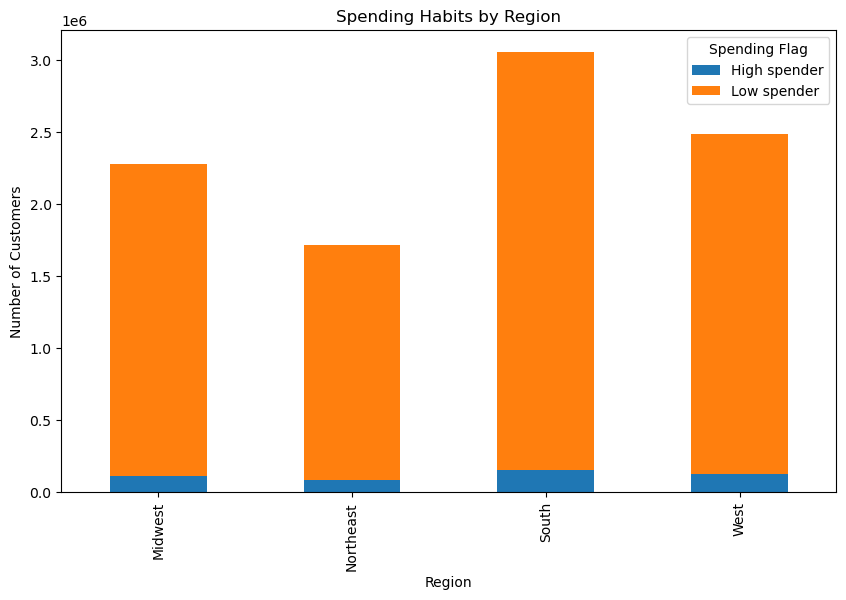

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
spending_pivot.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Spending Habits by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Customers')
ax.legend(title='Spending Flag')
plt.show()
#create visualization

In [26]:
path = r'C:\Users\user\Instacart Project\04 Analysis'
#define path for export

In [27]:
fig.savefig(os.path.join(path, 'Visualizations', 'stacked_bar_spending_habits.png'))
#export bar chart

## Spending Study, Exclude low order customers

In [28]:
orders_per_customer = df_sampleic.groupby('user_id')['order_id'].nunique()
#calc number of orders per customer

In [29]:
low_activity_flag = orders_per_customer < 5
#condition one for flag column

In [30]:
df_sampleic['low_activity_customer'] = df_sampleic['user_id'].map(low_activity_flag)
#condition two for flag column

In [31]:
df_customer_ords = df_sampleic[df_sampleic['low_activity_customer'] == False]
#condition three for flag column

In [32]:
df_customer_ords.head(5)

,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,median_days_since_prior,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity_customer
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,20.5,Female,Alabama,31,NaT,3,married,40423,South,False
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,20.5,Female,Alabama,31,NaT,3,married,40423,South,False
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,20.5,Female,Alabama,31,NaT,3,married,40423,South,False
6,550135,1,7,1,9,20.0,False,196.0,1.0,1.0,...,20.5,Female,Alabama,31,NaT,3,married,40423,South,False
10,2539329,1,1,2,8,NaN,True,14084.0,2.0,0.0,...,20.5,Female,Alabama,31,NaT,3,married,40423,South,False


In [33]:
df_customer_ords.value_counts()

order_id  user_id  order_number  day_of_week  order_hour_of_day  days_since_prior_order  first_order_flag  product_id  add_to_cart_order  reordered  product_name                                          aisle_id  department_id  prices  max_order  loyalty_flag      avg_price_per_user  spending_flag  user_frequency     median_days_since_prior  Gender  STATE           Age  date_joined  n_dependants  fam_status        income  Region     low_activity_customer
3407484   129908   8             1            21                 13.0                    False             35306.0     27.0               0.0        Gluten Free Organic Peanut Butter & Chocolate Cereal  121       14             6.8     10         New customer      6.858537            Low spender    Frequent customer  8.0                      Female  Georgia         31   2018-09-02   2             married           54197   South      False                    2
1092516   150865   11            3            15                 19.0        

In [34]:
df_customer_ords.to_pickle('filtered_customers.pkl')
#export file

## Marketing Strategies, Customer Profiling

In [50]:
df_sampleic['age_group'] = pd.cut(df_sampleic['Age'], bins=[18, 30, 45, 60, 100], labels=['18-29', '30-44', '45-59', '60+'])
#create age group

In [51]:
df_sampleic['income_bracket'] = pd.cut(df_sampleic['income'], bins=[0, 40000, 80000, 120000, 160000, 200000], labels=['Low', 'Lower Middle', 'Middle', 'Upper Middle', 'High'])
#create income group

In [52]:
df_sampleic['dependents_category'] = pd.cut(df_sampleic['n_dependants'], bins=[0, 1, 3, 10], labels=['None', 'One to Two', 'Three or More'], right=False)
#create dependents category

In [53]:
df_ic['shopping_period'] = ['Morning' if x < 12 else 'Afternoon' if 12 <= x < 18 else 'Evening' for x in df_ic['order_hour_of_day']]
#create shopping time preference

In [54]:
df_sampleic['favourite_department'] = df_sampleic.groupby('user_id')['department_id'].agg(lambda x: x.mode()[0])
#create department preferance

In [58]:
def simplified_profile(row):
    if row['age_group'] == '18-29' and row['dependents_category'] == 'None':
        return 'Single Adult'
    elif row['age_group'] in ['30-44', '45-59'] and row['dependents_category'] != 'None':
        return 'Parent'
    elif row['age_group'] == '60+':
        return 'Elder'
    else:
        return 'Other'

df_sampleic['customer_profile'] = df_sampleic.apply(simplified_profile, axis=1)

#create conditions

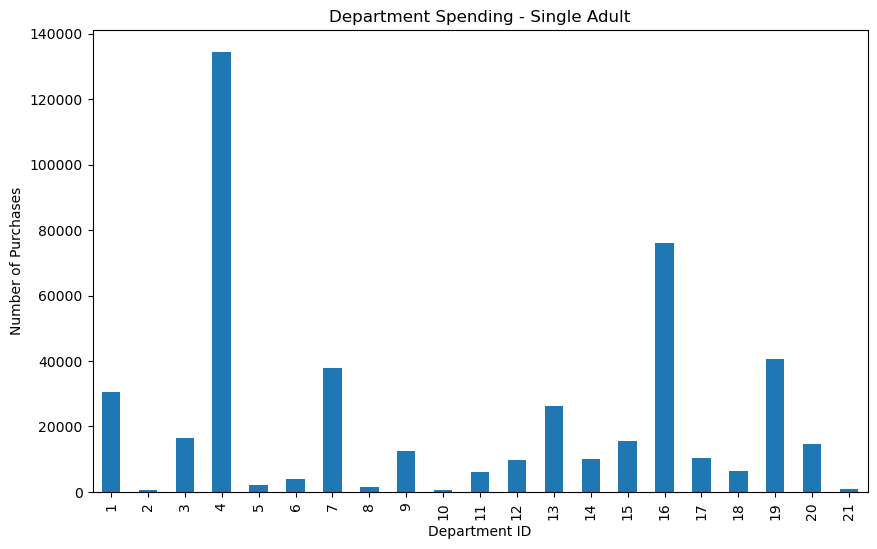

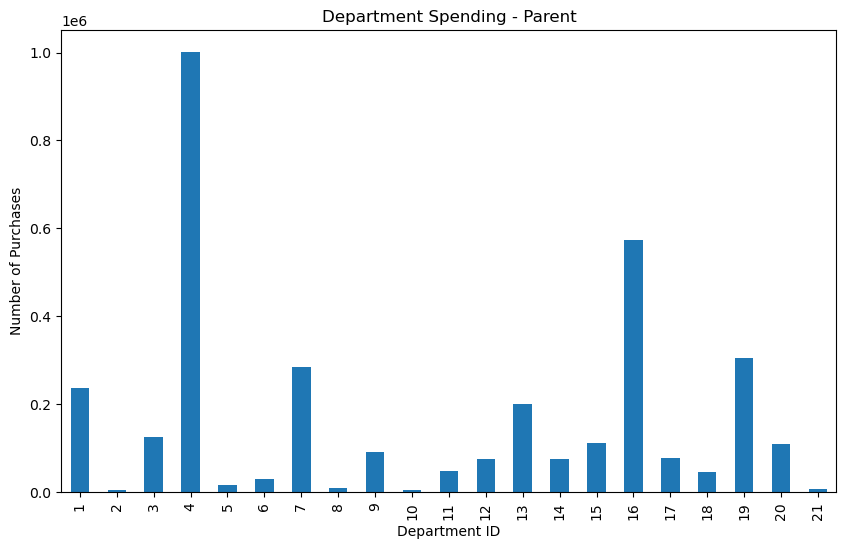

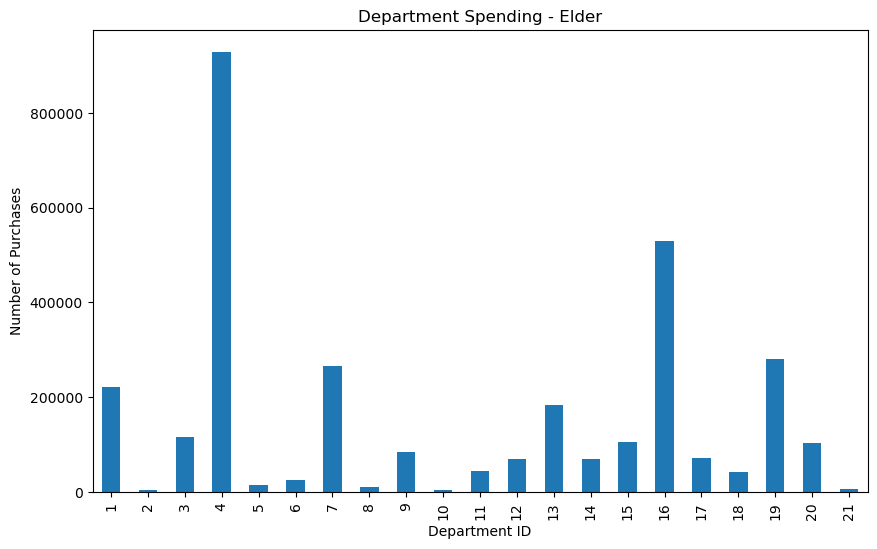

In [70]:
for profile in ['Single Adult', 'Parent', 'Elder']:
    department_spending = df_sampleic[df_sampleic['customer_profile'] == profile].groupby('department_id').size()
    department_spending.plot(kind='bar', figsize=(10, 6), title=f"Department Spending - {profile}")
    plt.xlabel('Department ID')
    plt.ylabel('Number of Purchases')
    plt.savefig(os.path.join(path, 'Visualizations', f'bar_chart_{profile}.png'))  # Export each chart with a unique name
    plt.show()
#create visualization

In [66]:
profiles_to_visualize = ['Elder', 'Parent', 'Single Adult']

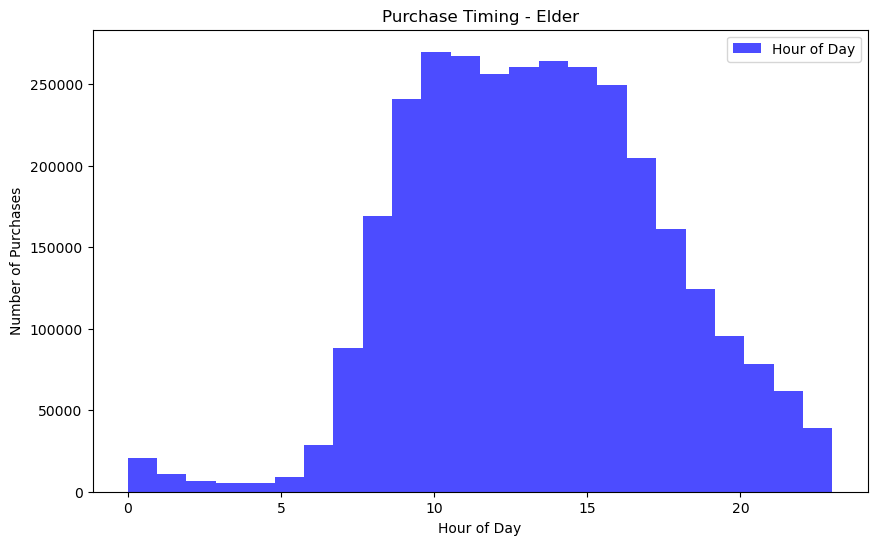

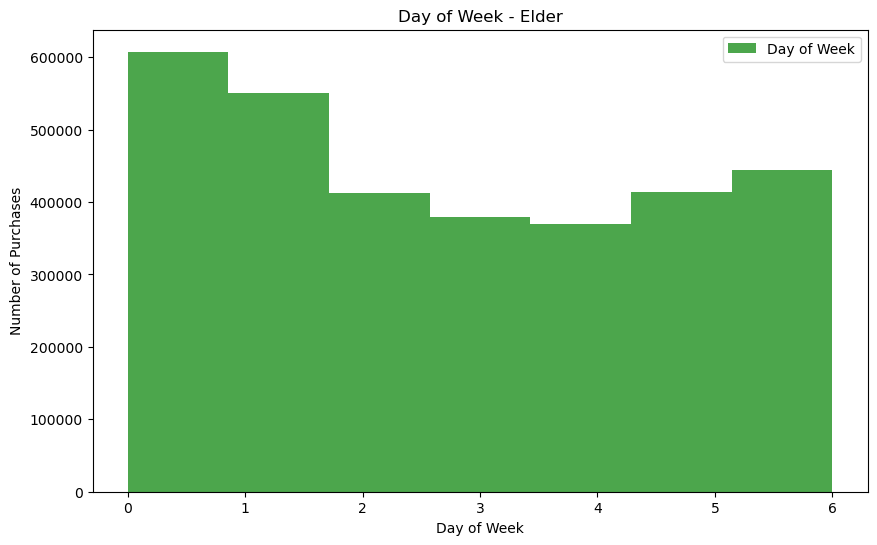

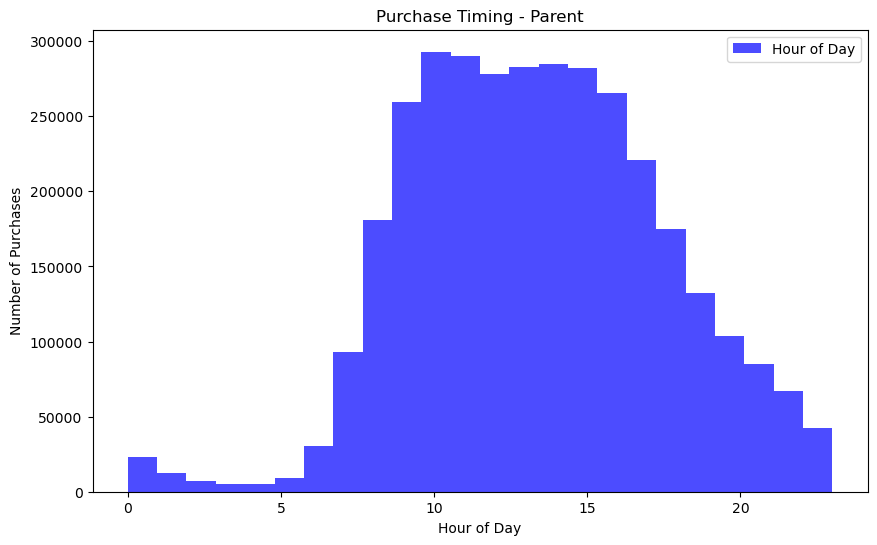

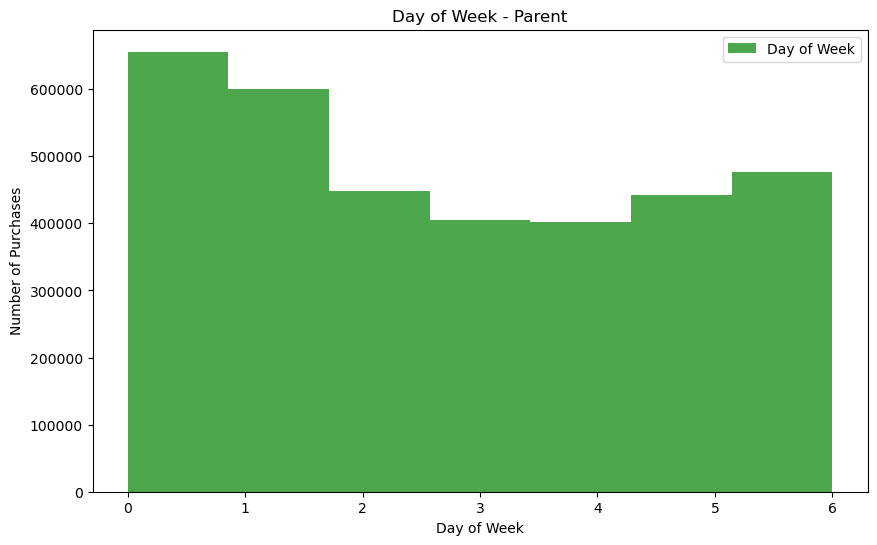

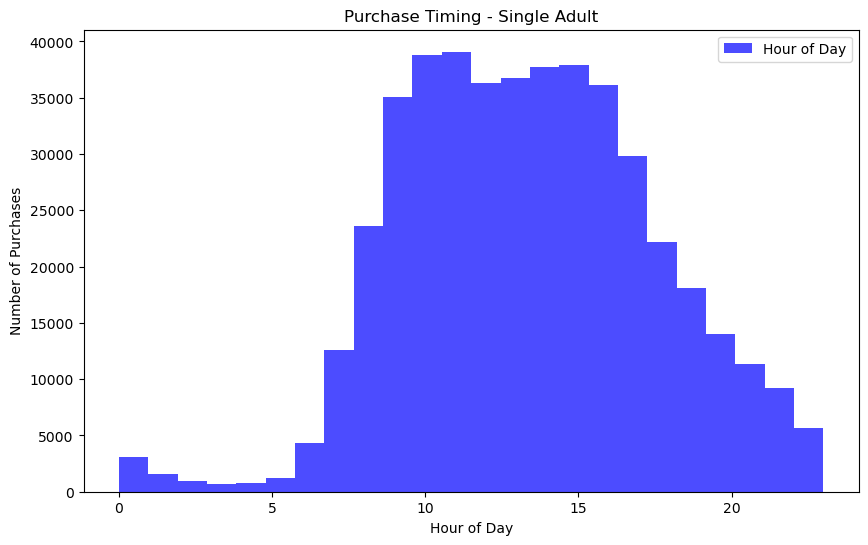

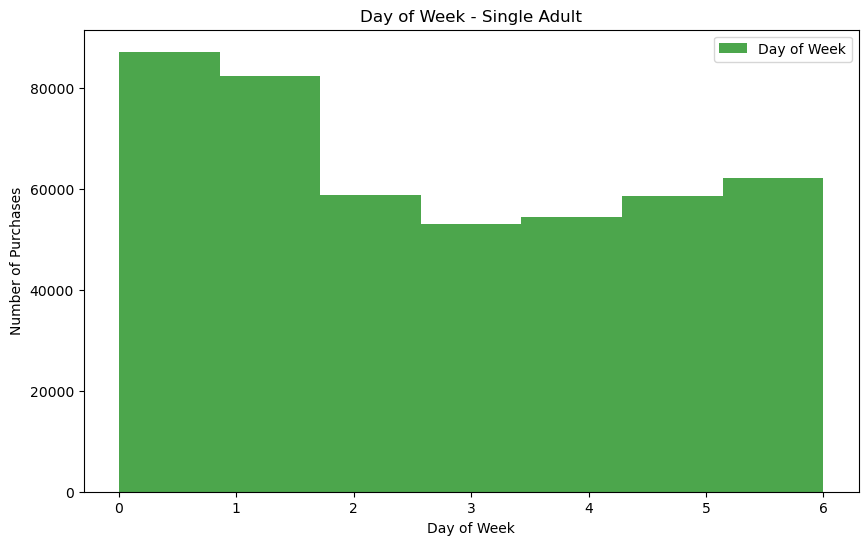

In [73]:
for profile in profiles_to_visualize:
    # Filter the data for the specific customer profile
    profile_data = df_sampleic[df_sampleic['customer_profile'] == profile]
    
    # Plot purchase timing by hour of day
    plt.figure(figsize=(10, 6))
    plt.hist(profile_data['order_hour_of_day'], bins=24, alpha=0.7, color='b', label='Hour of Day')
    plt.title(f"Purchase Timing - {profile}")
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Purchases')
    plt.legend()
    plt.savefig(os.path.join(path, 'Visualizations', f'purchase_timing_hour_{profile}.png'))  # Export the chart
    plt.show()
    
    # Plot purchase timing by day of week
    plt.figure(figsize=(10, 6))
    plt.hist(profile_data['day_of_week'], bins=7, alpha=0.7, color='g', label='Day of Week')
    plt.title(f"Day of Week - {profile}")
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Purchases')
    plt.legend()
    plt.savefig(os.path.join(path, 'Visualizations', f'purchase_timing_day_{profile}.png'))  # Export the chart
    plt.show()

## Customer Profiling Study

In [113]:
aggregation_functions = {
    'days_since_prior_order': ['max', 'mean', 'min'],
    'avg_price_per_user': ['max', 'mean', 'min']}
#define functions for study

In [114]:
profile_stats = df_sampleic.groupby('customer_profile').agg(aggregation_functions)

In [115]:
print("Aggregated Statistics for Usage Frequency and Expenditure:")
print(profile_stats)

Aggregated Statistics for Usage Frequency and Expenditure:
                 days_since_prior_order                 avg_price_per_user  \
                                    max       mean  min                max   
customer_profile                                                             
Elder                              30.0  11.081697  0.0       40005.515000   
Other                              30.0  11.083687  0.0       99999.000000   
Parent                             30.0  11.121797  0.0       26320.178947   
Single Adult                       30.0  11.208740  0.0       17955.337607   

                                  
                       mean  min  
customer_profile                  
Elder             11.828473  1.0  
Other             12.188616  1.0  
Parent            11.893237  1.0  
Single Adult      12.392672  1.0  


this is a sample size of the data only analyzing 30 percent, since the total dataframe has millions of data pieces. These aggreagted functions do not reflect the whole dataframe; min and max are scewed due to use of a sample data size

In [126]:
grouped_data = df_sampleic.groupby(['Region', 'customer_profile', 'department_id'])
#group data by customer profile state and department id

In [119]:
metrics = grouped_data.agg({
    'order_id': 'count', 
    'avg_price_per_user': 'mean'})
#calc count of order id column and mean of avg price per user column

In [131]:
profile_counts = grouped_data.size().reset_index(name='count')
#calc counts of customer profiles

In [132]:
print(profile_counts)

      Region customer_profile  department_id   count
0    Midwest            Elder              1   50825
1    Midwest            Elder              2     831
2    Midwest            Elder              3   26899
3    Midwest            Elder              4  218351
4    Midwest            Elder              5    3459
..       ...              ...            ...     ...
331     West     Single Adult             17    2820
332     West     Single Adult             18    1476
333     West     Single Adult             19   10187
334     West     Single Adult             20    3689
335     West     Single Adult             21     272

[336 rows x 4 columns]


# Export Dataframe

In [4]:
df_ic.to_pickle(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\instacart_dataframe.pkl')
#export dataframe 